In [33]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt


def mul_matrix_by_vector(matrix, vector):
    assert len(matrix[0]) == len(vector)
    return np.array([sum(matrix[i][j] * vector[j] for j in range(len(vector))) for i in range(len(matrix))])

def gauss(A, b):
    n = len(A)
    A = deepcopy(A)
    b = deepcopy(b)

    for i in range(n - 1):
        if A[i][i] == 0:
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    A[i], A[j] = A[j], A[i]
                    break

        for j in range(i + 1, n):
            f = A[j][i] / A[i][i]
            A[j] -= f * A[i]
            b[j] -= f * b[i]

    x = np.zeros(shape=(n, ))

    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    return np.array(x)

def norm(vector):
    return max(abs(vector))

def norm_matrix(matrix):
    return max([sum(abs(matrix[i][j]) for j in range(len(matrix[i])) if j != i) / abs(matrix[i][i]) for i in range(len(matrix))])

def generate_matrix(n, a = -10, b = 10, diag=None):
    A = np.random.uniform(a, b, (n, n))
    if diag is not None:
        for i in range(len(A)):
            A[i][i] = abs(A[i][i])
            A[i][i] += diag * sum(abs(A[i][j]) for j in range(n) if j != i)
    return A

def check_diag_dom(A):
    for i in range(len(A)):
        s = sum(abs(A[i][j]) for j in range(len(A[i])) if j != i)
        if A[i][i] < s:
            return False
    return True

def jacobi(A, b, delta=1e-7):
    n = len(A)
    x_prev = np.zeros(shape=(n, ))
    difference = np.array([1] * n)
    x_k = None
    i = 0
    while norm(difference) > delta:
        x_k = np.array([sum([b[i]] + [A[i][j] * x_prev[j] * -1 for j in range(n) if j != i]) / A[i][i] for i in range(n)])
        difference = x_k - x_prev
        x_prev = deepcopy(x_k)
        i += 1
    return x_k, i

def seidel(A, b, delta=1e-7):
    n = len(A)
    x_prev = np.zeros(shape=(n, ))
    difference = np.array([1] * n)
    x_k = None
    k = 0
    while norm(difference) > delta:
        x_k = deepcopy(x_prev)
        for i in range(n):
            x_i = b[i]
            x_i -= sum(A[i][j] * x_k[j] for j in range(i))
            x_i -= sum(A[i][j] * x_prev[j] for j in range(i + 1, n))
            x_i /= A[i][i]
            x_k[i] = x_i
        difference = x_k - x_prev
        x_prev = deepcopy(x_k)
        k += 1
    return x_k, k


In [34]:
n = 3
A = generate_matrix(n=n, diag=2)


if check_diag_dom(A):
    print('Matrix has diagonal dominance')
else:
    print('Matrix has not diagonal dominance')

print("||P|| = ", norm_matrix(A), "< 1")

x = np.random.uniform(-10, 10, size=(n, ))

b = mul_matrix_by_vector(matrix=A, vector=x)

gauss_answer = gauss(A, b)
jacobi_answer, i = jacobi(A, b)

print("Iterations:",  i)
print("Gauss: ", gauss_answer, " norm dif: ", norm(gauss_answer - x))
print("Jacobi", jacobi_answer, " norm dif: ", norm(jacobi_answer - x))
print("Real: ", x)

Matrix has diagonal dominance
||P|| =  0.49461419353023217 < 1
Iterations: 14
Gauss:  [ 6.53727331 -0.32912652 -5.04412352]  norm dif:  0.0
Jacobi [ 6.5372733  -0.32912651 -5.04412352]  norm dif:  7.329552076384971e-09
Real:  [ 6.53727331 -0.32912652 -5.04412352]


In [35]:
if check_diag_dom(A):
    print('Matrix has diagonal dominance')
else:
    print('Matrix has not diagonal dominance')

print("||P|| = ", norm_matrix(A), "< 1")

gauss_answer = gauss(A, b)
seidel_answer, i = seidel(A, b)

print("Iterations:",  i)
print("Gauss: ", gauss_answer, " norm dif: ", norm(gauss_answer - x))
print("Seidel", seidel_answer, " norm dif: ", norm(seidel_answer - x))
print("Real: ", x)

Matrix has diagonal dominance
||P|| =  0.49461419353023217 < 1
Iterations: 10
Gauss:  [ 6.53727331 -0.32912652 -5.04412352]  norm dif:  0.0
Seidel [ 6.53727331 -0.32912652 -5.04412352]  norm dif:  1.0115517312669908e-09
Real:  [ 6.53727331 -0.32912652 -5.04412352]


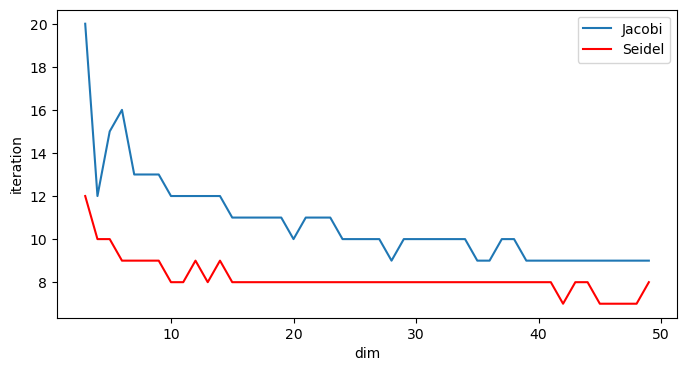

In [36]:
jacobi_y = []
seidel_y = []
n_arr = [i for i in range(3, 50)]
for n in n_arr:
    A = generate_matrix(n=n, diag=2)
    x = np.random.uniform(-10, 10, size=(n, ))
    b = mul_matrix_by_vector(matrix=A, vector=x)

    jacobi_answer, jacobi_i = jacobi(A, b)
    seidel_answer, seidel_i = seidel(A, b)
    jacobi_y.append(jacobi_i)
    seidel_y.append(seidel_i)

plt.figure(figsize=(8, 4))
plt.xlabel("dim")
plt.ylabel("iteration")
plt.plot(n_arr, jacobi_y, label='Jacobi')
plt.plot(n_arr, seidel_y, label='Seidel', color='red')
plt.legend()
plt.show()